In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from spacy.lang.en.stop_words import STOP_WORDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#found code solution from stackoverflow: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/kchien_data/

df = pd.read_csv('all_reviews_for_vectorizing.csv')

Mounted at /content/drive
/content/drive/My Drive/kchien_data


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#data cleanup
df.dropna(inplace=True)

#data sample down
df2 = df.sample(frac=0.02)

In [4]:
#stopwords
custom_stop = ['airbnb', 'air bnb', 't', 's', 'air', 'bnb', 'new', 'york', 'new york', 'stay', 'place', 'apartment']
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop).union(STOP_WORDS)

In [5]:
#implement stopwords and vectorize
cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(2,2))

comments = cvec.fit_transform(df2['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names_out())

all_bigrams = commentsdf.sum().reset_index().rename(columns={'index' : 'word', 0:'count'})

top_bigrams = commentsdf.sum().sort_values(ascending = False).head(50)

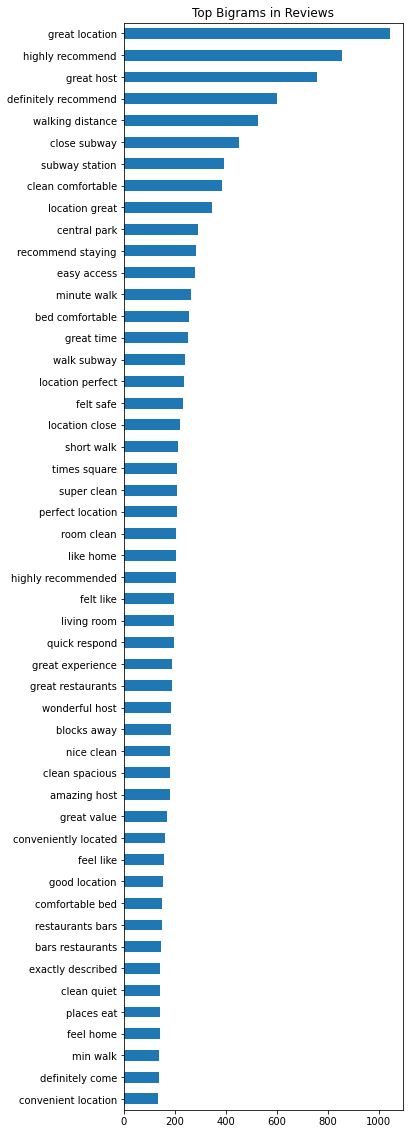

In [6]:
#bar chart top bigrams
top_bigrams.sort_values(ascending=True).plot(kind = 'barh', figsize=(5,20), title='Top Bigrams in Reviews');

In [7]:
#implement stopwords and vectorize for unigrams
cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(1,1))

comments = cvec.fit_transform(df2['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names_out())

top_unigrams = commentsdf.sum().sort_values(ascending = False).head(50)

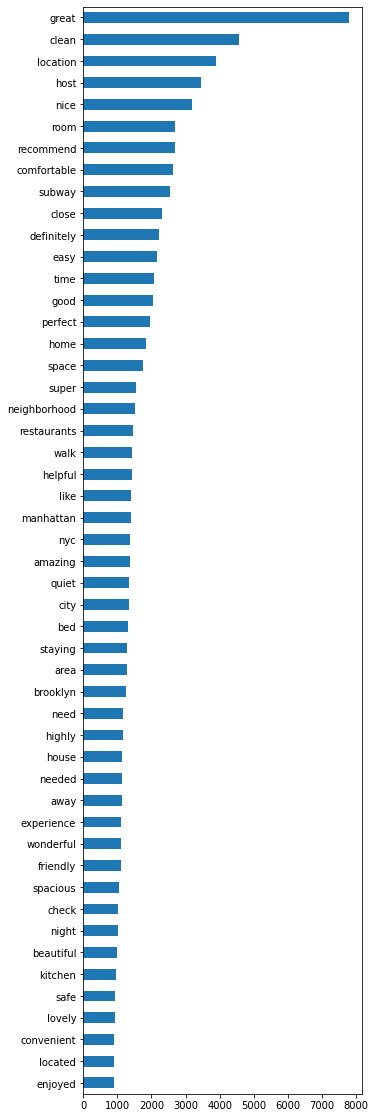

In [8]:
top_unigrams.sort_values(ascending=True).plot(kind = 'barh', figsize=(5,20));

# Themes related from sampled dataset mentioned in reviews to be selected for classification target:
- **Location** (walking distance, subway, close subway, great location, minute walk, times square, central park, blocks away, location close, metro station, neighborhood, nearby, close)
- **Host** (great host, quick respond, communication, host, responsive, accomodating, welcoming, welcoming)
- **Hygeine** (place clean, apartment clean, clean comfortable, room clean, super clean, clean)
- **Comfort** (bed comfortable, comfortable, like home, nice place, place nice, spacious, safe)
-**Cost** (great value, value)